In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def to255(num, val):
    x = (num*255)//val
    return x

#--------------------------------------------------------------------------------------------------------------

boundaries = [
        ([to255(20,360), to255(40,100), to255(60,100)], [to255(65,360), to255(100,100), to255(100,100)]),     #AMARILLO
        ([to255(100,360), to255(35,100), to255(40,100)], [to255(160,360), to255(100,100), to255(100,100)]),   #AZUL
        ([to255(10,360), to255(50,100), to255(55,100)], [to255(35,360), to255(98,100), to255(98,100)]),       #NARANJA
        ([to255(0,360), to255(55,100), to255(50,100)], [to255(10,360), to255(100,100), to255(80,100)]),       #ROJO
        ([to255(60,360), to255(30,100), to255(10,100)], [to255(120,360), to255(100,100), to255(100,100)]),    #VERDE
        ([to255(180,360), to255(0,100), to255(0,100)], [to255(240,360), to255(70,100), to255(70,100)]),       #MORADO
        ([to255(200,360), to255(20,100), to255(75,100)], [to255(360,360), to255(100,100), to255(100,100)]),   #ROSA
        ]

#-------------------------------------------------------------------------------------------------------------------

def display(img, cmap = None):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)
    
#-----------------------------------------------------------------------------------------------------------------

def find_center(img, color):
    global boundaries
    centers = []
    kernel = np.ones(shape = (4,4), dtype = np.uint8)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    if color == "orange":
        lower = np.array(boundaries[2][0], dtype = "uint8")
        upper = np.array(boundaries[2][1], dtype = "uint8")
    elif color == "red":
        lower = np.array(boundaries[3][0], dtype = "uint8")
        upper = np.array(boundaries[3][1], dtype = "uint8")
    elif color == "green":
        lower = np.array(boundaries[4][0], dtype = "uint8")
        upper = np.array(boundaries[4][1], dtype = "uint8")
    elif color == "pink":
        lower = np.array(boundaries[6][0], dtype = "uint8")
        upper = np.array(boundaries[6][1], dtype = "uint8")
    elif color == "purple":
        lower = np.array(boundaries[5][0], dtype = "uint8")
        upper = np.array(boundaries[5][1], dtype = "uint8")
    elif color == "yellow":
        lower = np.array(boundaries[0][0], dtype = "uint8")
        upper = np.array(boundaries[0][1], dtype = "uint8")
    elif color == "blue":
        lower = np.array(boundaries[1][0], dtype = "uint8")
        upper = np.array(boundaries[1][1], dtype = "uint8")
        
    mask = cv2.inRange(hsv_img, lower, upper)
    result = cv2.bitwise_and(rgb_img, rgb_img, mask = mask)
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)

    eroded = cv2.erode(thresh, kernel, iterations = 1)
    dilated = cv2.dilate(eroded, kernel, iterations = 2)

    image, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) != 0:
        for i in contours:
        
            conv_hull = cv2.convexHull(i)

            top    = tuple(conv_hull[conv_hull[:,:,1].argmin()][0])
            bottom = tuple(conv_hull[conv_hull[:,:,1].argmax()][0])
            left   = tuple(conv_hull[conv_hull[:,:,0].argmin()][0])
            right  = tuple(conv_hull[conv_hull[:,:,0].argmax()][0])

            cX = (left[0] + right[0]) // 2
            cY = (top[1] + bottom[1]) // 2

            centers.append((cX, cY))
            
        return centers
    return None

#-------------------------------------------------------------------------------------------------------------------

def min_distance(pt1, iterable):
    x1 = pt1[0][0]
    y1 = pt1[0][1]
    min_distance = 10000000
    min_center = 0
    for i, (x2, y2) in enumerate(iterable):
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if distance < min_distance:
            min_distance = distance
            min_center = i 
    return min_center

#-------------------------------------------------------------------------------------------------------------------

def draw_line(img, c1, c2):
    min_c = min_distance(c1, c2)
    cv2.line(img, c1[0], c2[min_c], color = 255, thickness = 2)
    cv2.circle(img, c1[0], radius = 3, color = (0,255,0), thickness = -1)
    cv2.circle(img, c2[min_c], radius = 3, color = (0,255,0), thickness = -1)
    return img

#-------------------------------------------------------------------------------------------------------------------

def find_robot_center(img, color1, color2):
    centers1 = find_center(img, color1)
    centers2 = find_center(img, color2)
    c1 = centers1[0]
    c2 = centers2[min_distance(centers1, centers2)]
    robot_center = (c1[0]+c2[0]) // 2, (c1[1]+c2[1]) // 2
    return c1, c2, robot_center

(377, 303)

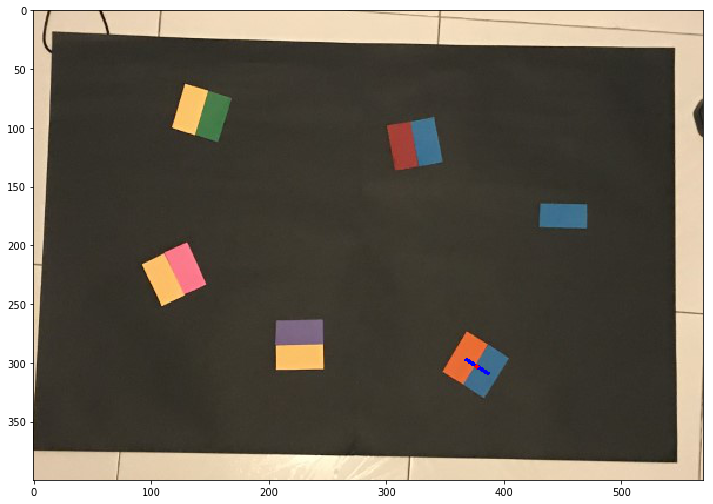

In [30]:
img = cv2.imread('C:/Users/jprr2/Videos/Logitech/LogiCapture/cancha.jpg')


cancha = img[280:680, 360:930, :]

c1, c2, robot_center = find_robot_center(cancha, "orange", "blue")
#draw_line(cancha, c1, c2)
cv2.line(cancha, c1, c2, color = 255, thickness = 2)
cv2.circle(cancha, robot_center , radius = 2, color = (0,0,255), thickness = -1)

rgb_img = cv2.cvtColor(cancha, cv2.COLOR_BGR2RGB)

display(rgb_img)
